# Preparation data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from datetime import datetime
sns.set(context="notebook", style="darkgrid")

In [ ]:
for file in os.listdir():
    if file.endswith("csv"):
        data = pd.read_csv(file)

In [ ]:
data.head()

,datetime,stationId,source,city,address,lat,lng,pm25
0,2022-01-06 02:00:00 UTC,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,132.0
1,2022-01-10 13:00:00 UTC,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,95.0
2,2022-01-13 20:00:00 UTC,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,78.0
3,2022-01-14 08:00:00 UTC,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,17.0
4,2022-01-14 10:00:00 UTC,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,42.0


In [ ]:
data.shape

(63138, 8)

#### I have data about air of Almaty, consisting of 63138 rows and 8 cowls.

Datetime is time from 2020-06-21 to 2022-01-16.

StationId is sensor of air

Address are streets of Almaty

Source is website of data air. there are 3 websites US Conculate, PurpleAir.com, IQAir that provide data air of Almay.

Pm25 is level of polluted air

# Questions
1. Explore condition of air Almaty past last 3 years
2. which are streets more pollutted and cleaner in Almaty ?
3. in which are weekdays air of Almaty is clean and dirty ?
4. in whcih are months air of Almaty is clear and dirty ?

In [ ]:
def missing_value(data=data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False)
    return pd.concat([total, percent], axis=1, keys = ["total","percent"])

In [ ]:
missing_value(data)

,total,percent
pm25,0,0.0
lng,0,0.0
lat,0,0.0
address,0,0.0
city,0,0.0
source,0,0.0
stationId,0,0.0
datetime,0,0.0


Checking for missing value 

In [ ]:
pd_data = data.copy()
pd_data["datetime"] = pd.to_datetime(pd_data["datetime"]).dt.date

In [ ]:
pd_data.head()

,datetime,stationId,source,city,address,lat,lng,pm25
0,2022-01-06,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,132.0
1,2022-01-10,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,95.0
2,2022-01-13,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,78.0
3,2022-01-14,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,17.0
4,2022-01-14,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,42.0


In [ ]:
pd_data["datetime"] = pd_data["datetime"].astype("str")
for column in pd_data.columns.tolist():
    if column == "datetime":
        pd_data["year"] = pd_data[column].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").year)
        pd_data["month"] = pd_data[column].apply(lambda x: datetime.strftime(datetime.strptime(x, "%Y-%m-%d"),"%B")) 
        pd_data["day"] = pd_data[column].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").day)
        pd_data["weekday"] = pd_data[column].apply(lambda x: datetime.strftime(datetime.strptime(x,"%Y-%m-%d"),"%A"))
        pd_data[column] = pd_data[column].astype("datetime64") 

Here I divide column datetime to many columns, in order to get information about level of air in weekday, year, day, month

In [ ]:
pd_data.head()

,datetime,stationId,source,city,address,lat,lng,pm25,year,month,day,weekday
0,2022-01-06,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,132.0,2022,January,6,Thursday
1,2022-01-10,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,95.0,2022,January,10,Monday
2,2022-01-13,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,78.0,2022,January,13,Thursday
3,2022-01-14,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,17.0,2022,January,14,Friday
4,2022-01-14,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,42.0,2022,January,14,Friday


# Data visualization 

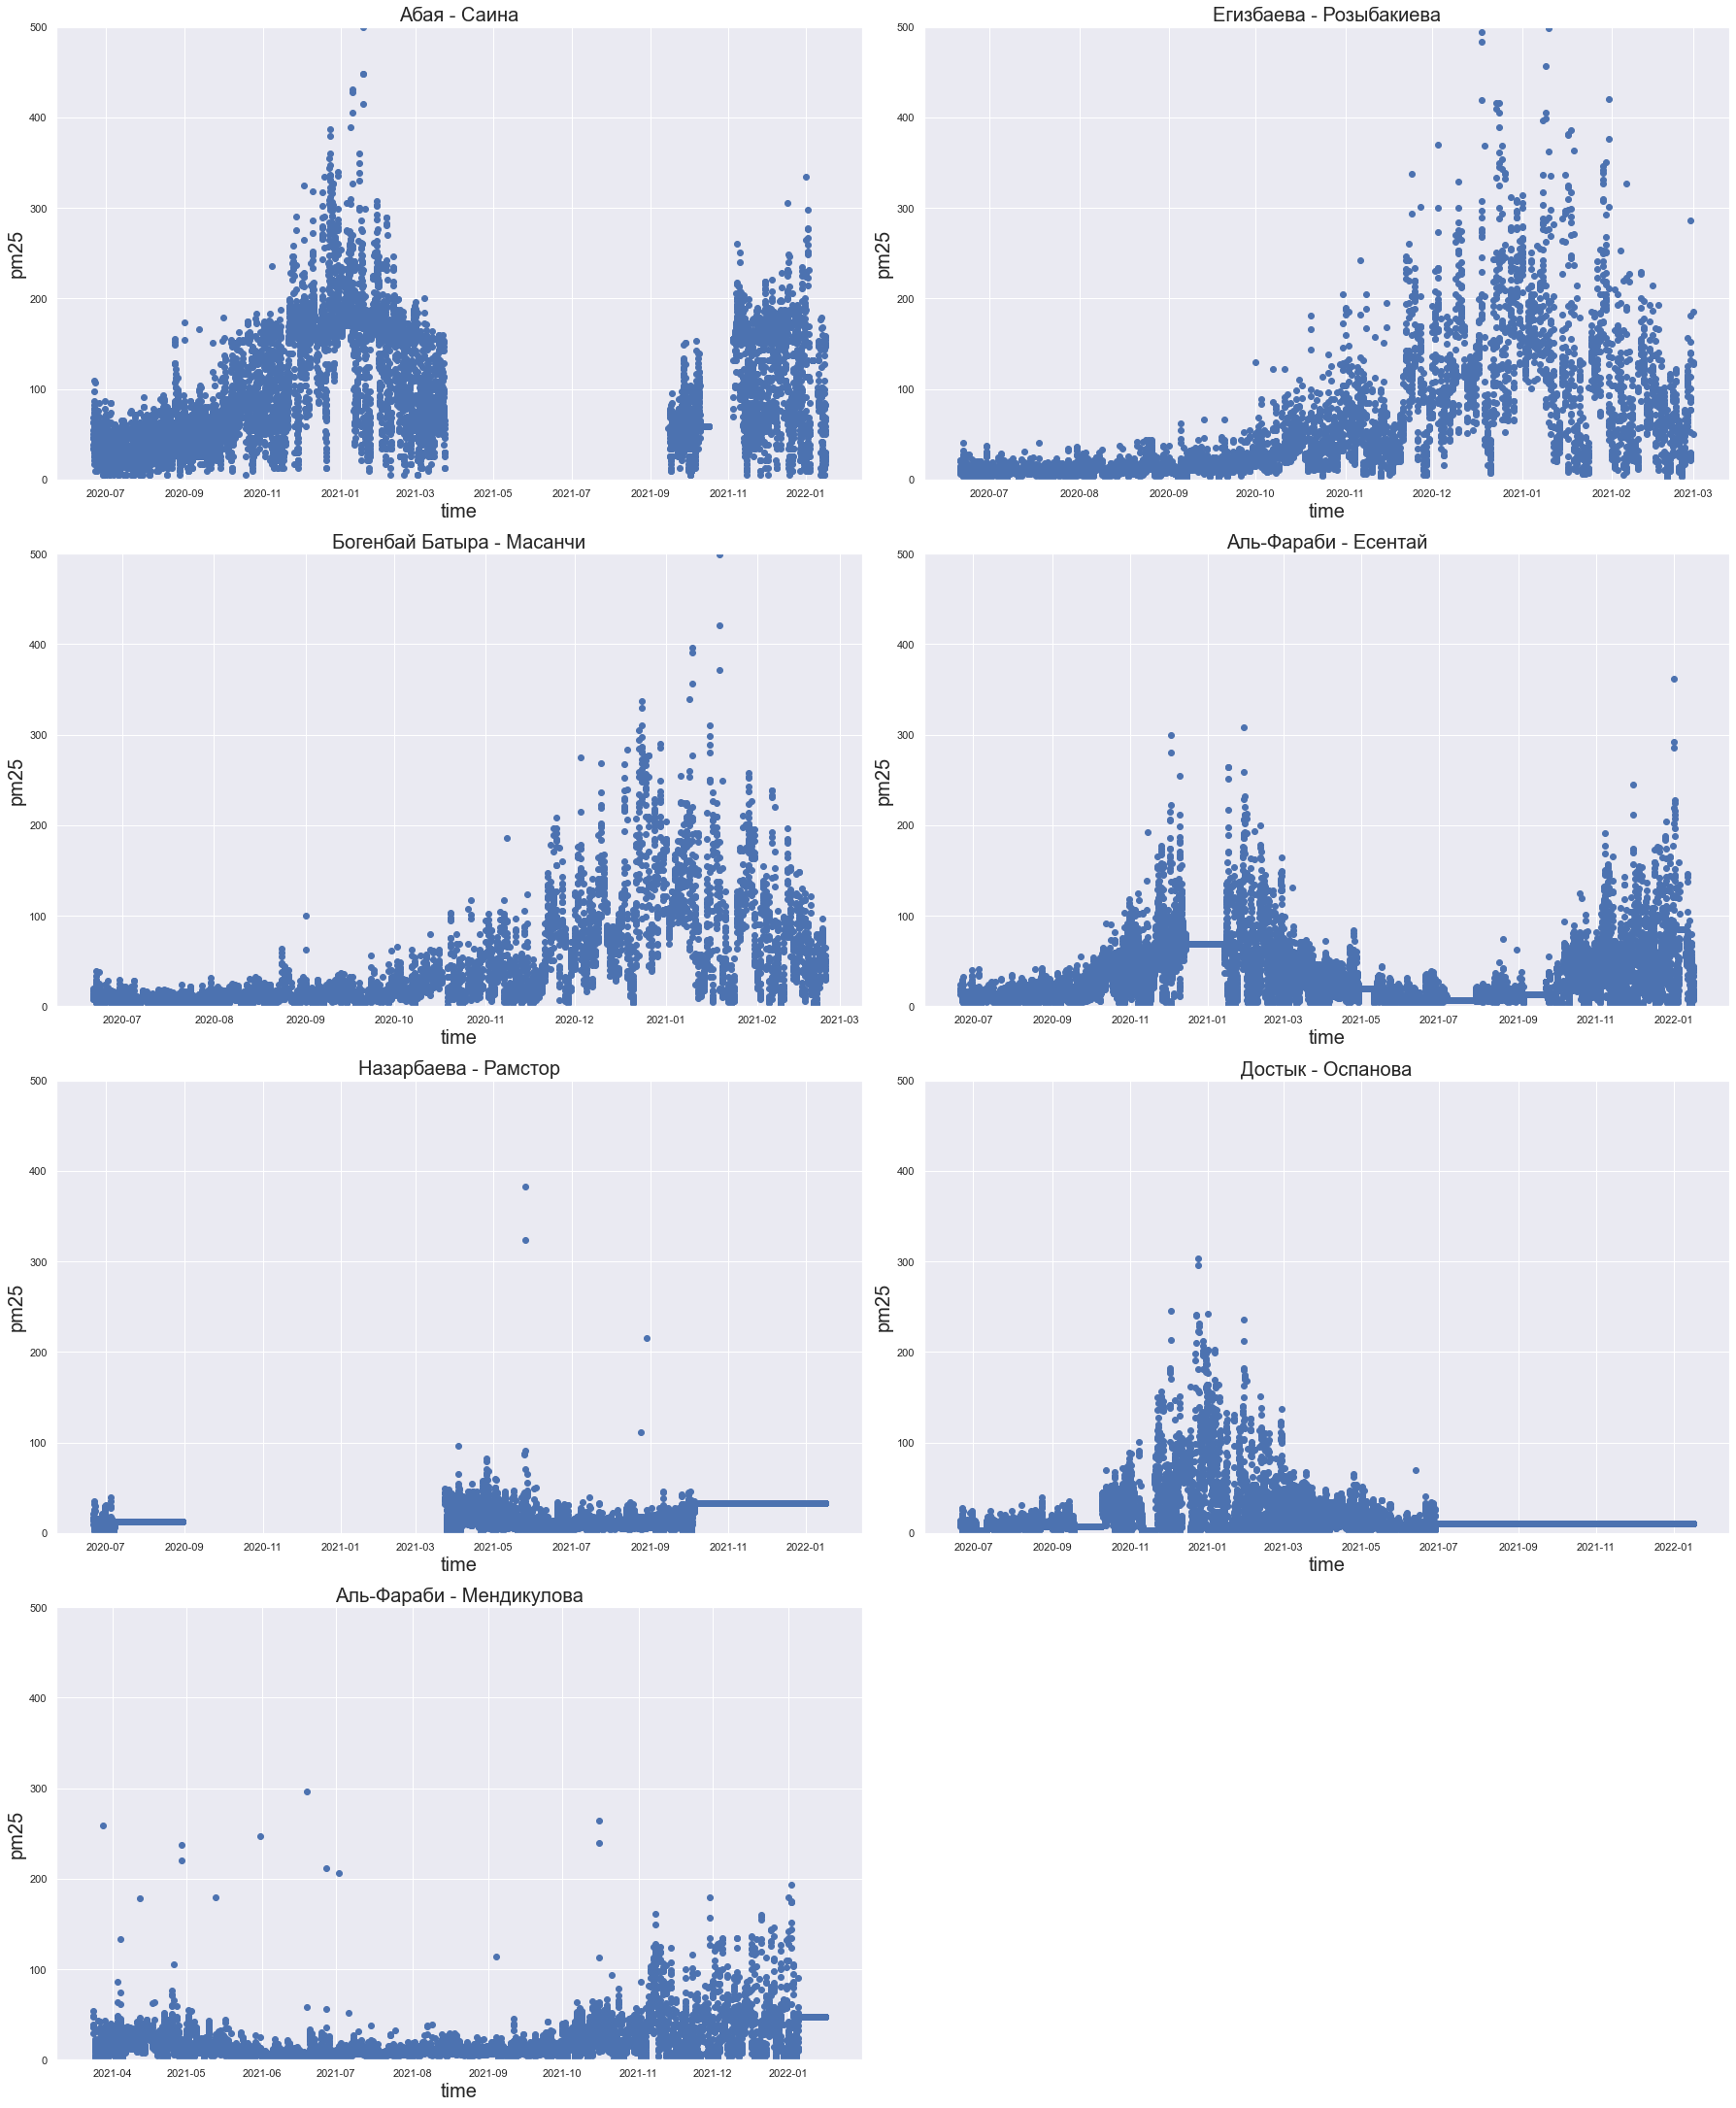

In [ ]:
fig, axs = plt.subplots(4,2, figsize=(25,30))
fig.delaxes(axs[3,1])
name_streets = pd_data["address"].unique().tolist()
for index in range(len(name_streets)):
    filter_data = pd_data[pd_data["address"] == name_streets[index]]
    plt.subplot(4,2,index+1)
    plt.tight_layout() 
    plt.scatter(filter_data["datetime"], filter_data["pm25"])
    plt.title(name_streets[index], size=20)
    plt.axis(ymin=0, ymax=500)
    plt.ylabel("pm25", fontsize=20)
    plt.xlabel("time", fontsize=20)

streets where pollution of air is on high level are: Абая - Сайна, Егизбаева - Розыбакиева, Богенбай батыр - Масанчи, Аль-Фараби-Есентай

streets where pollution of air is on normol level are: Аль-Фараби - Мендикулова, Назарбаева - Рамстор, Достык - Оспанова

Statistics of pm25 in 2022 in Almaty
mean pm25 is 48.9407920792082 in 2022 in Almaty 
median pm25 is 48.9407920792082 in 2022 in Almaty 
max pm25 is 361.74 in 2022
mean pm25 is 0.0 in 2022 in Almaty 

Statistics of pm25 in 2021 in Almaty
mean pm25 is 38.36475153292956 in 2021 in Almaty 
median pm25 is 38.36475153292956 in 2021 in Almaty 
max pm25 is 3336.54 in 2021
mean pm25 is 0.0 in 2021 in Almaty 

Statistics of pm25 in 2020 in Almaty
mean pm25 is 41.38448184234009 in 2020 in Almaty 
median pm25 is 41.38448184234009 in 2020 in Almaty 
max pm25 is 494.6 in 2020
mean pm25 is 0.0 in 2020 in Almaty 



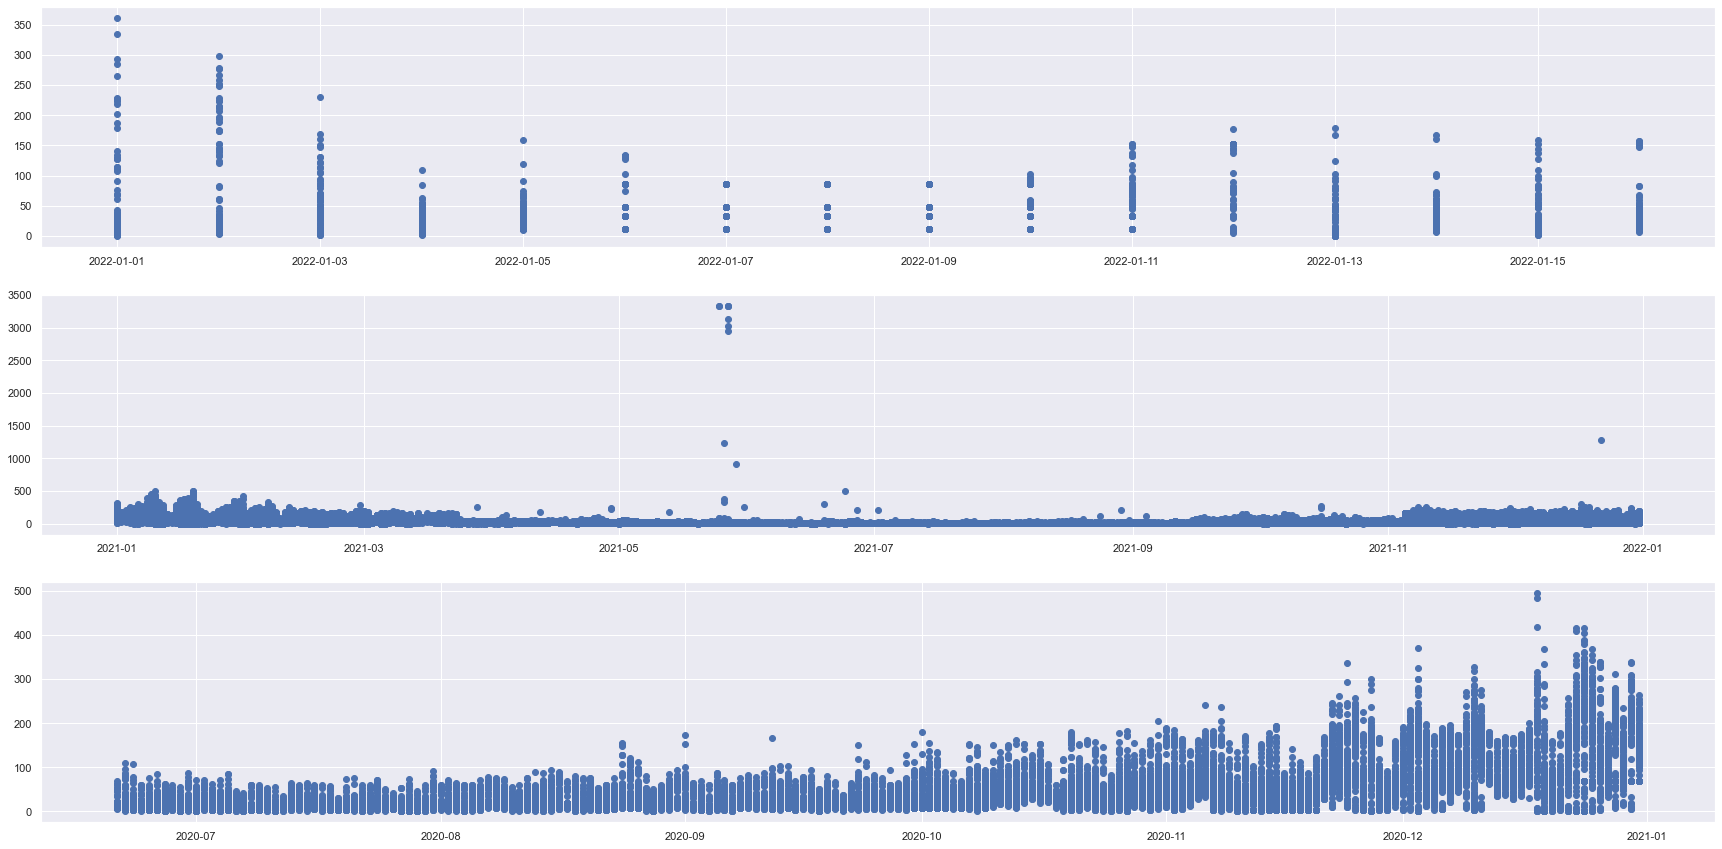

In [ ]:
fig, axs = plt.subplots(3,1, figsize=(30,15))
list_year = pd_data["year"].unique().tolist()
for index in range(len(list_year)):
    filter_data = pd_data[pd_data["year"] == list_year[index]]
    mean_value = filter_data["pm25"].mean()
    median_value = filter_data["pm25"].mean()
    max_value = filter_data["pm25"].max()
    min_value = filter_data["pm25"].min()
    plt.subplot(3,1, index+1)    
    plt.scatter(filter_data["datetime"], filter_data["pm25"])
    print(f"Statistics of pm25 in {list_year[index]} in Almaty")
    print(f"mean pm25 is {mean_value} in {list_year[index]} in Almaty ")
    print(f"median pm25 is {median_value} in {list_year[index]} in Almaty ")
    print(f"max pm25 is {max_value} in {list_year[index]}")
    print(f"mean pm25 is {min_value} in {list_year[index]} in Almaty ")
    print()

We can see by graphics that from 2020 to 2021 level of pollution air is lower than other years. because of pandemic government of country are prohibited people walking and moving by car at steets. it is influenced for level of pollution air in Almaty in 2020.

In [ ]:
def explore_date(data, time=None, figsize=(20,20)):
    if time == "day":
        figsize = (30,20)
    name_streets = pd_data["address"].unique().tolist()
    axs = []
    index = 1
    fig = plt.figure(figsize=figsize)
    for place in range(1,8):
        axs.append(fig.add_subplot(4,2,place))
    for count,ax in enumerate(axs,1):
        filter_data = pd_data[pd_data["address"] == name_streets[count-1]]
        if count == index:
            plt.tight_layout()
            sns.barplot(data=filter_data, x=time, y="pm25", ax=ax).set_title(f"mean value of pm25 at street {name_streets[count-1]}", size=20)
        index = index + 1

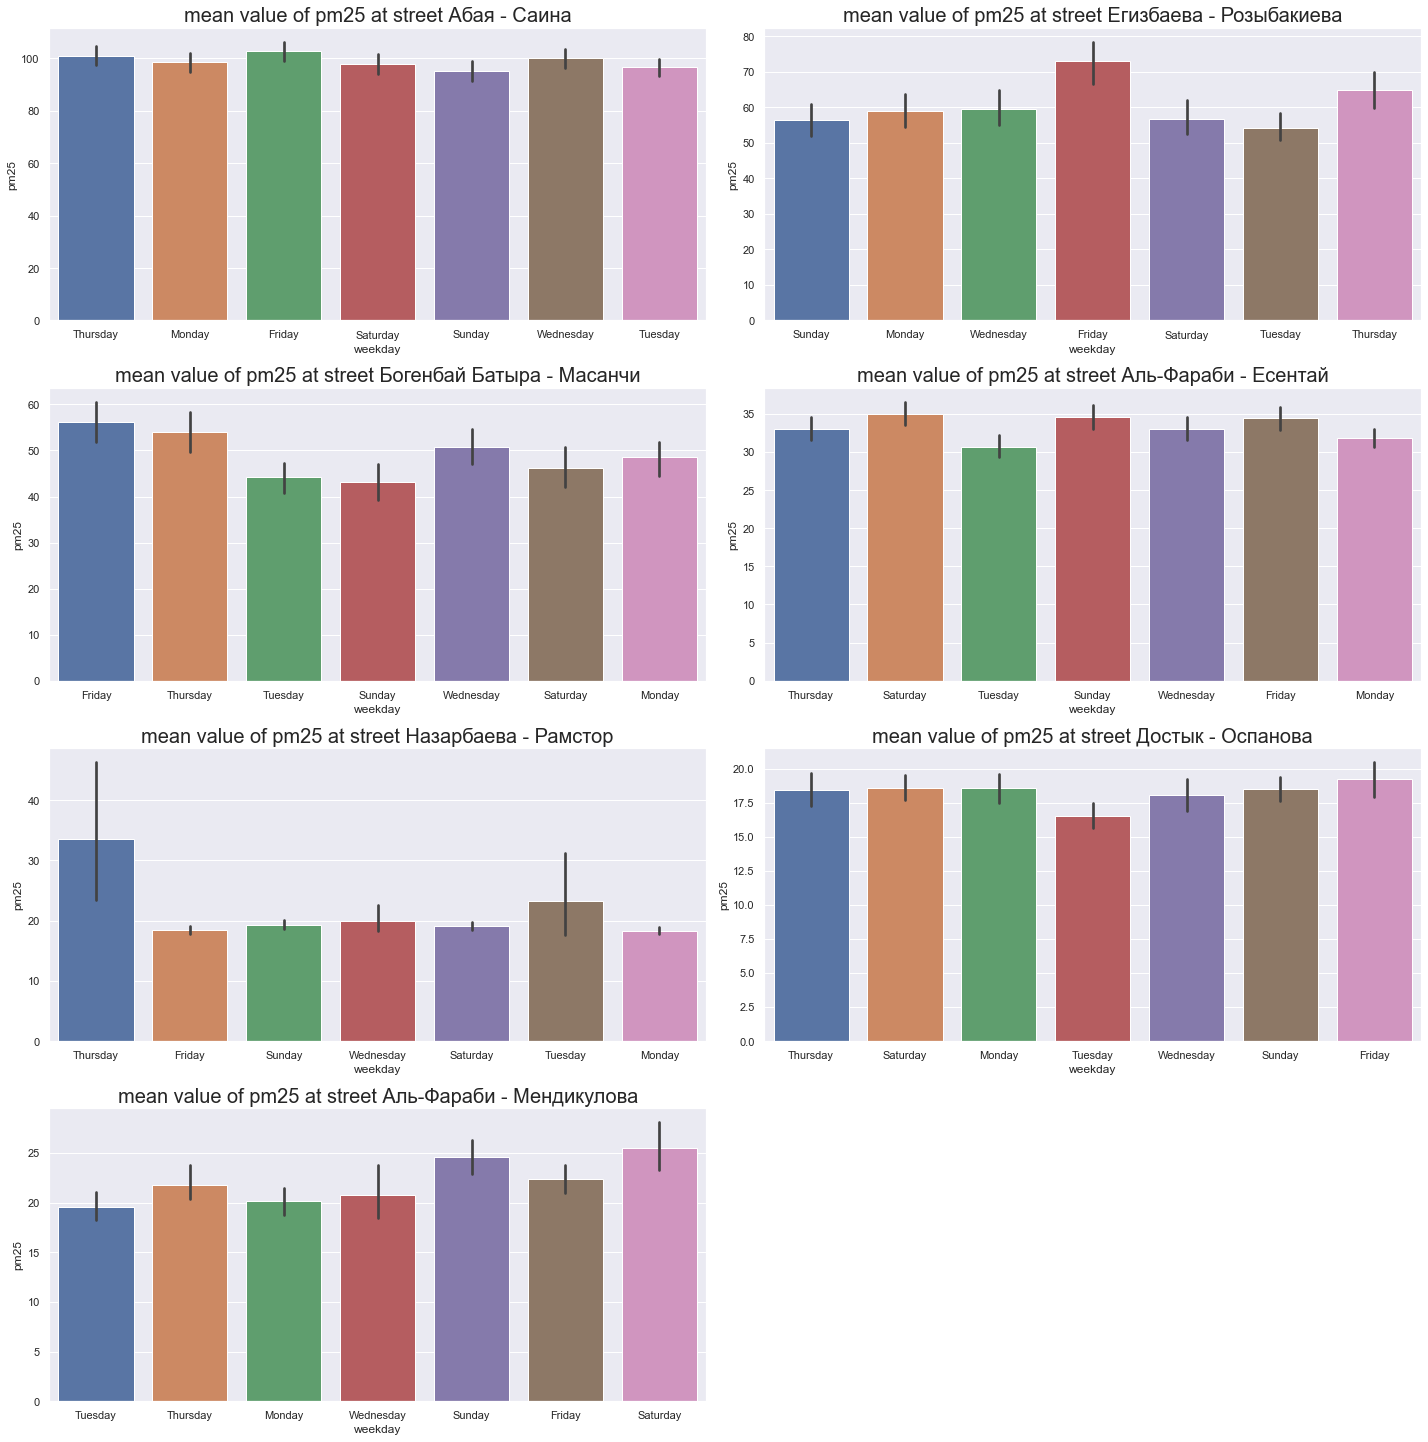

In [ ]:
explore_date(data=pd_data, time="weekday")

Mean value of pm25 in weekday at streets in Almaty

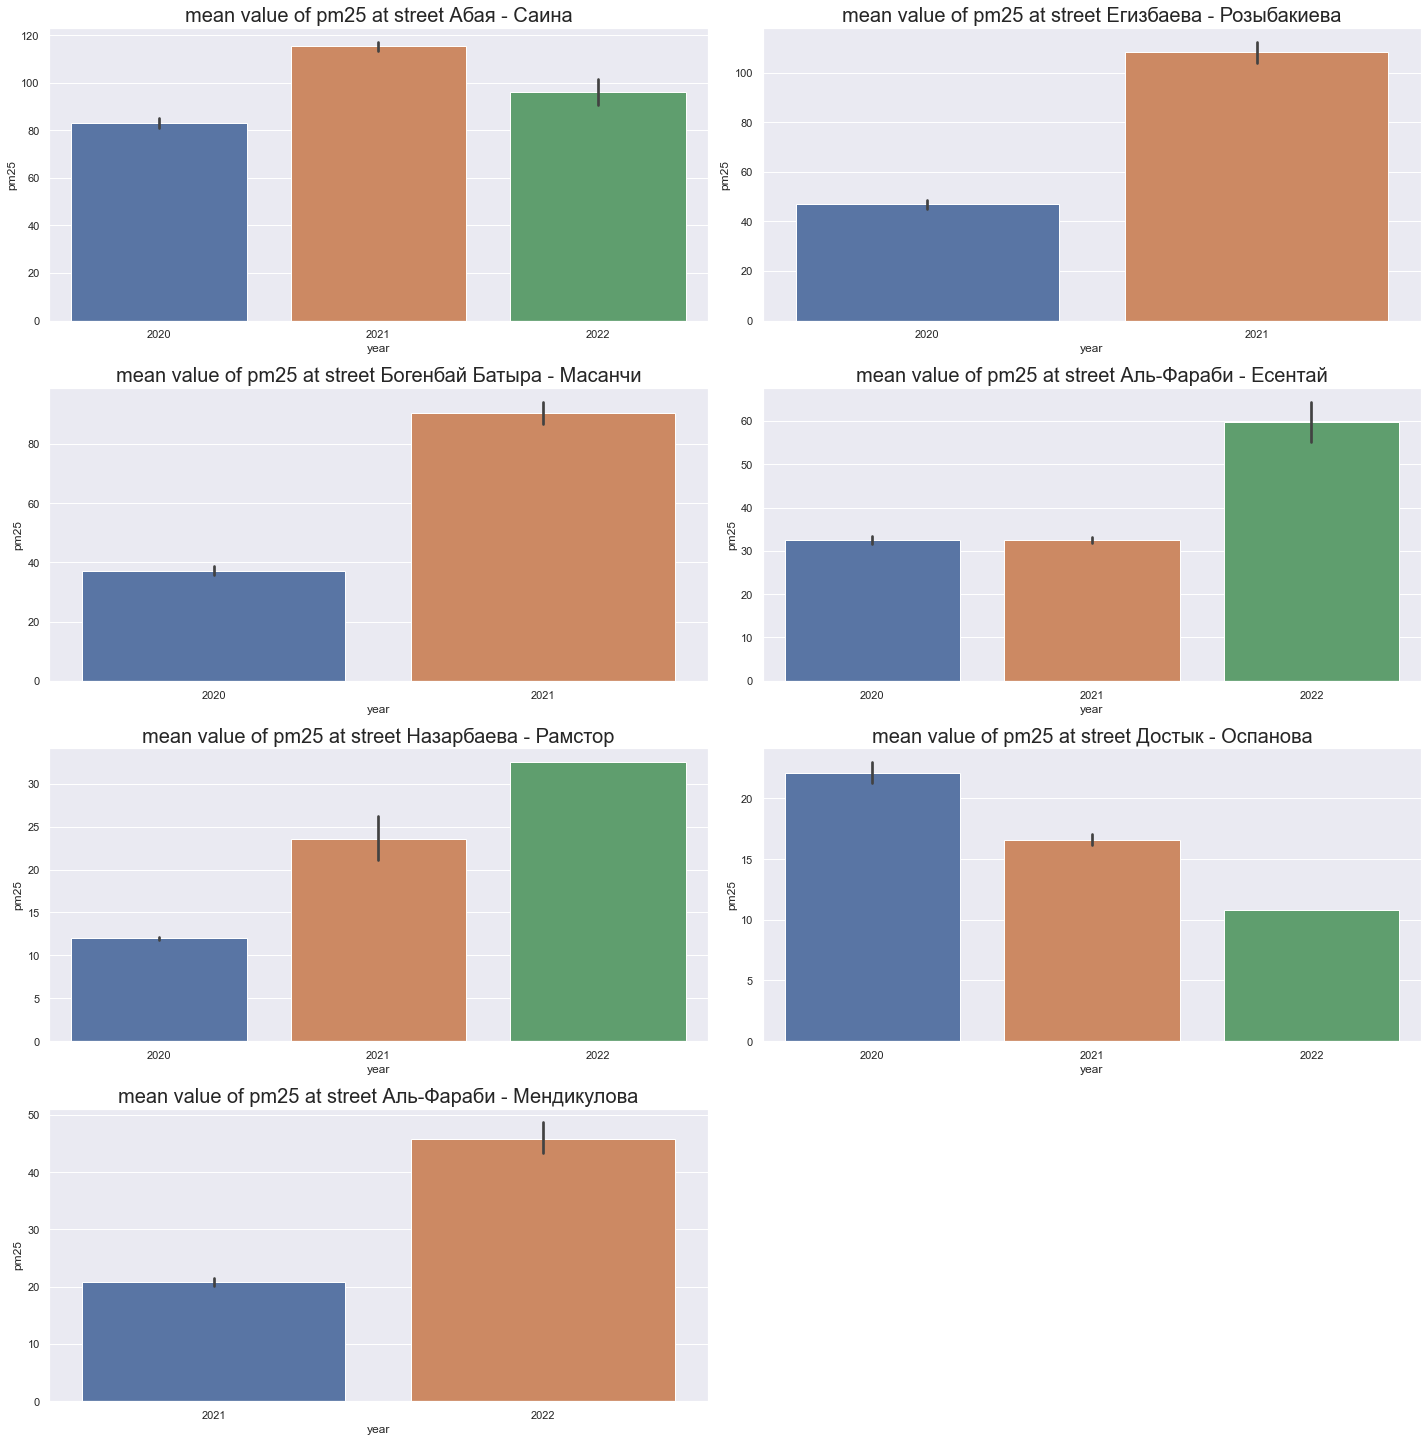

In [ ]:
explore_date(data=pd_data, time="year")

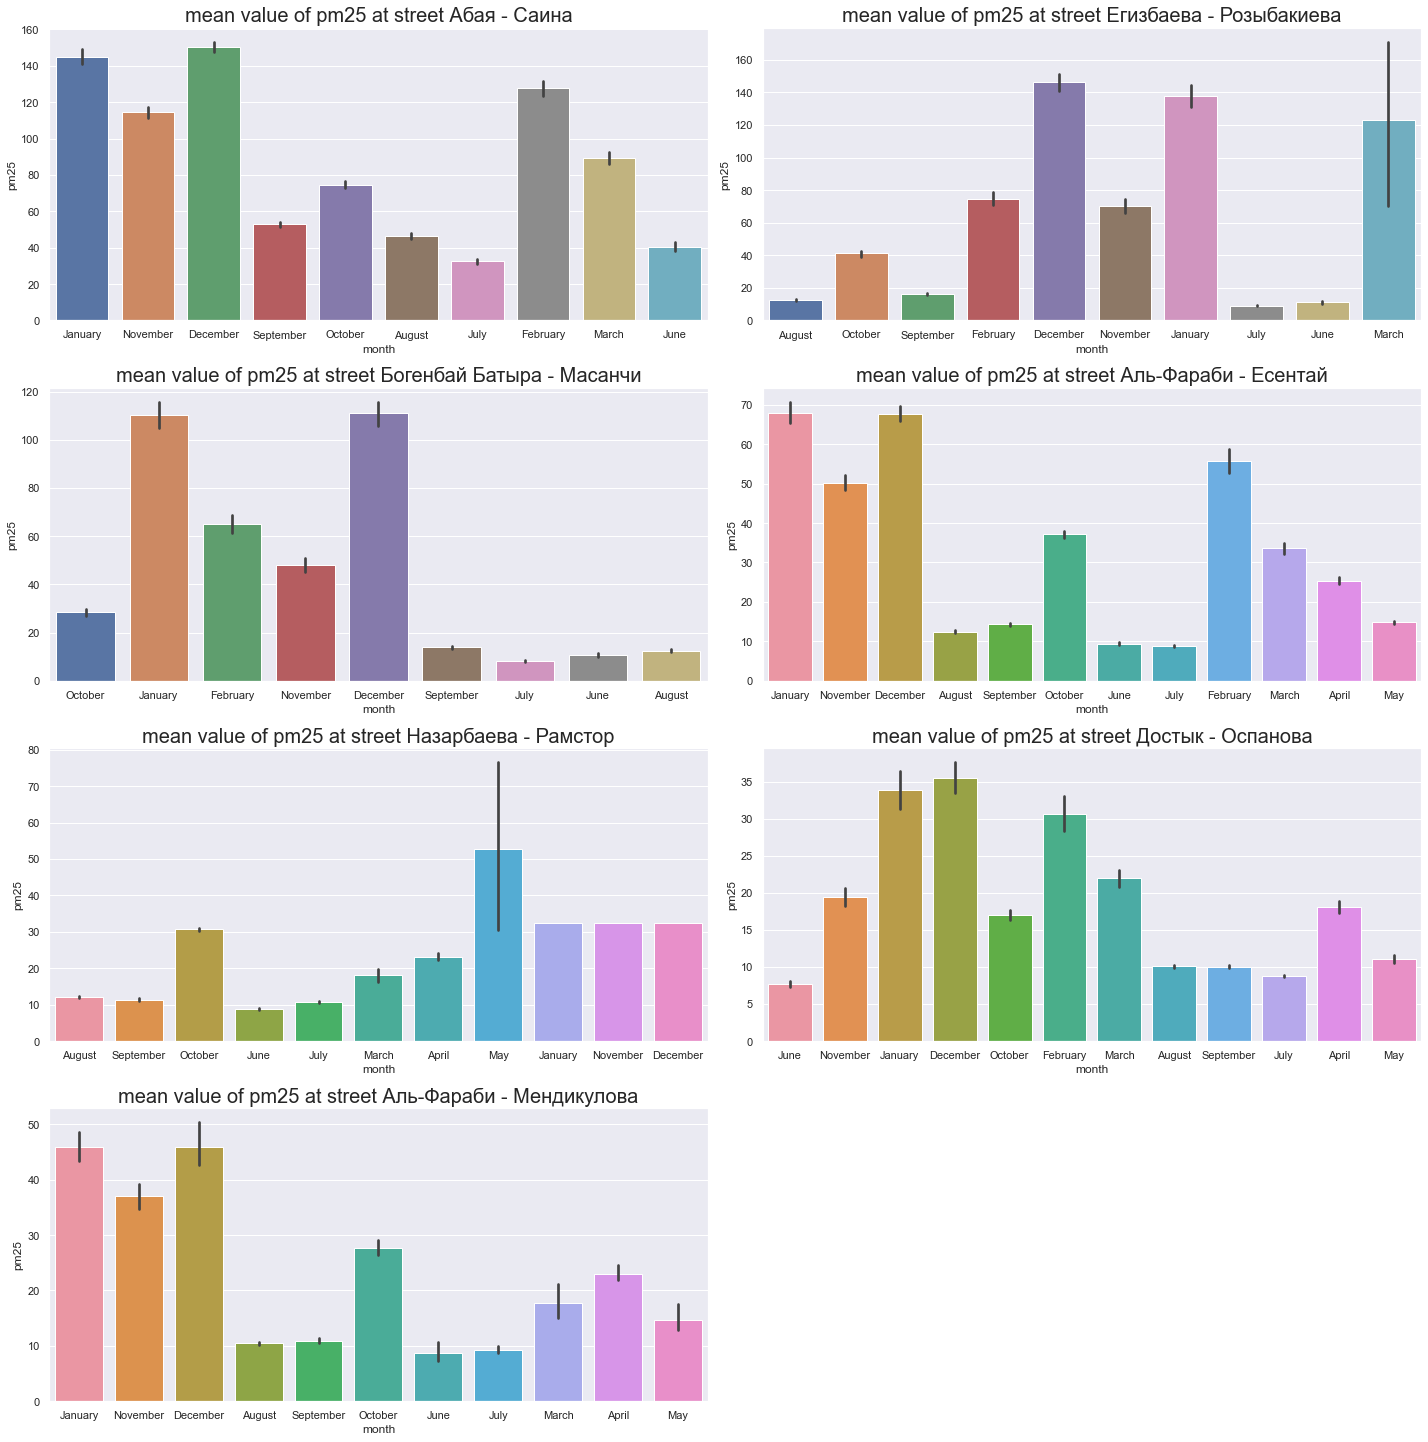

In [ ]:
explore_date(data=pd_data, time="month")

### We can see by barplots that the lowest polution of air in summer

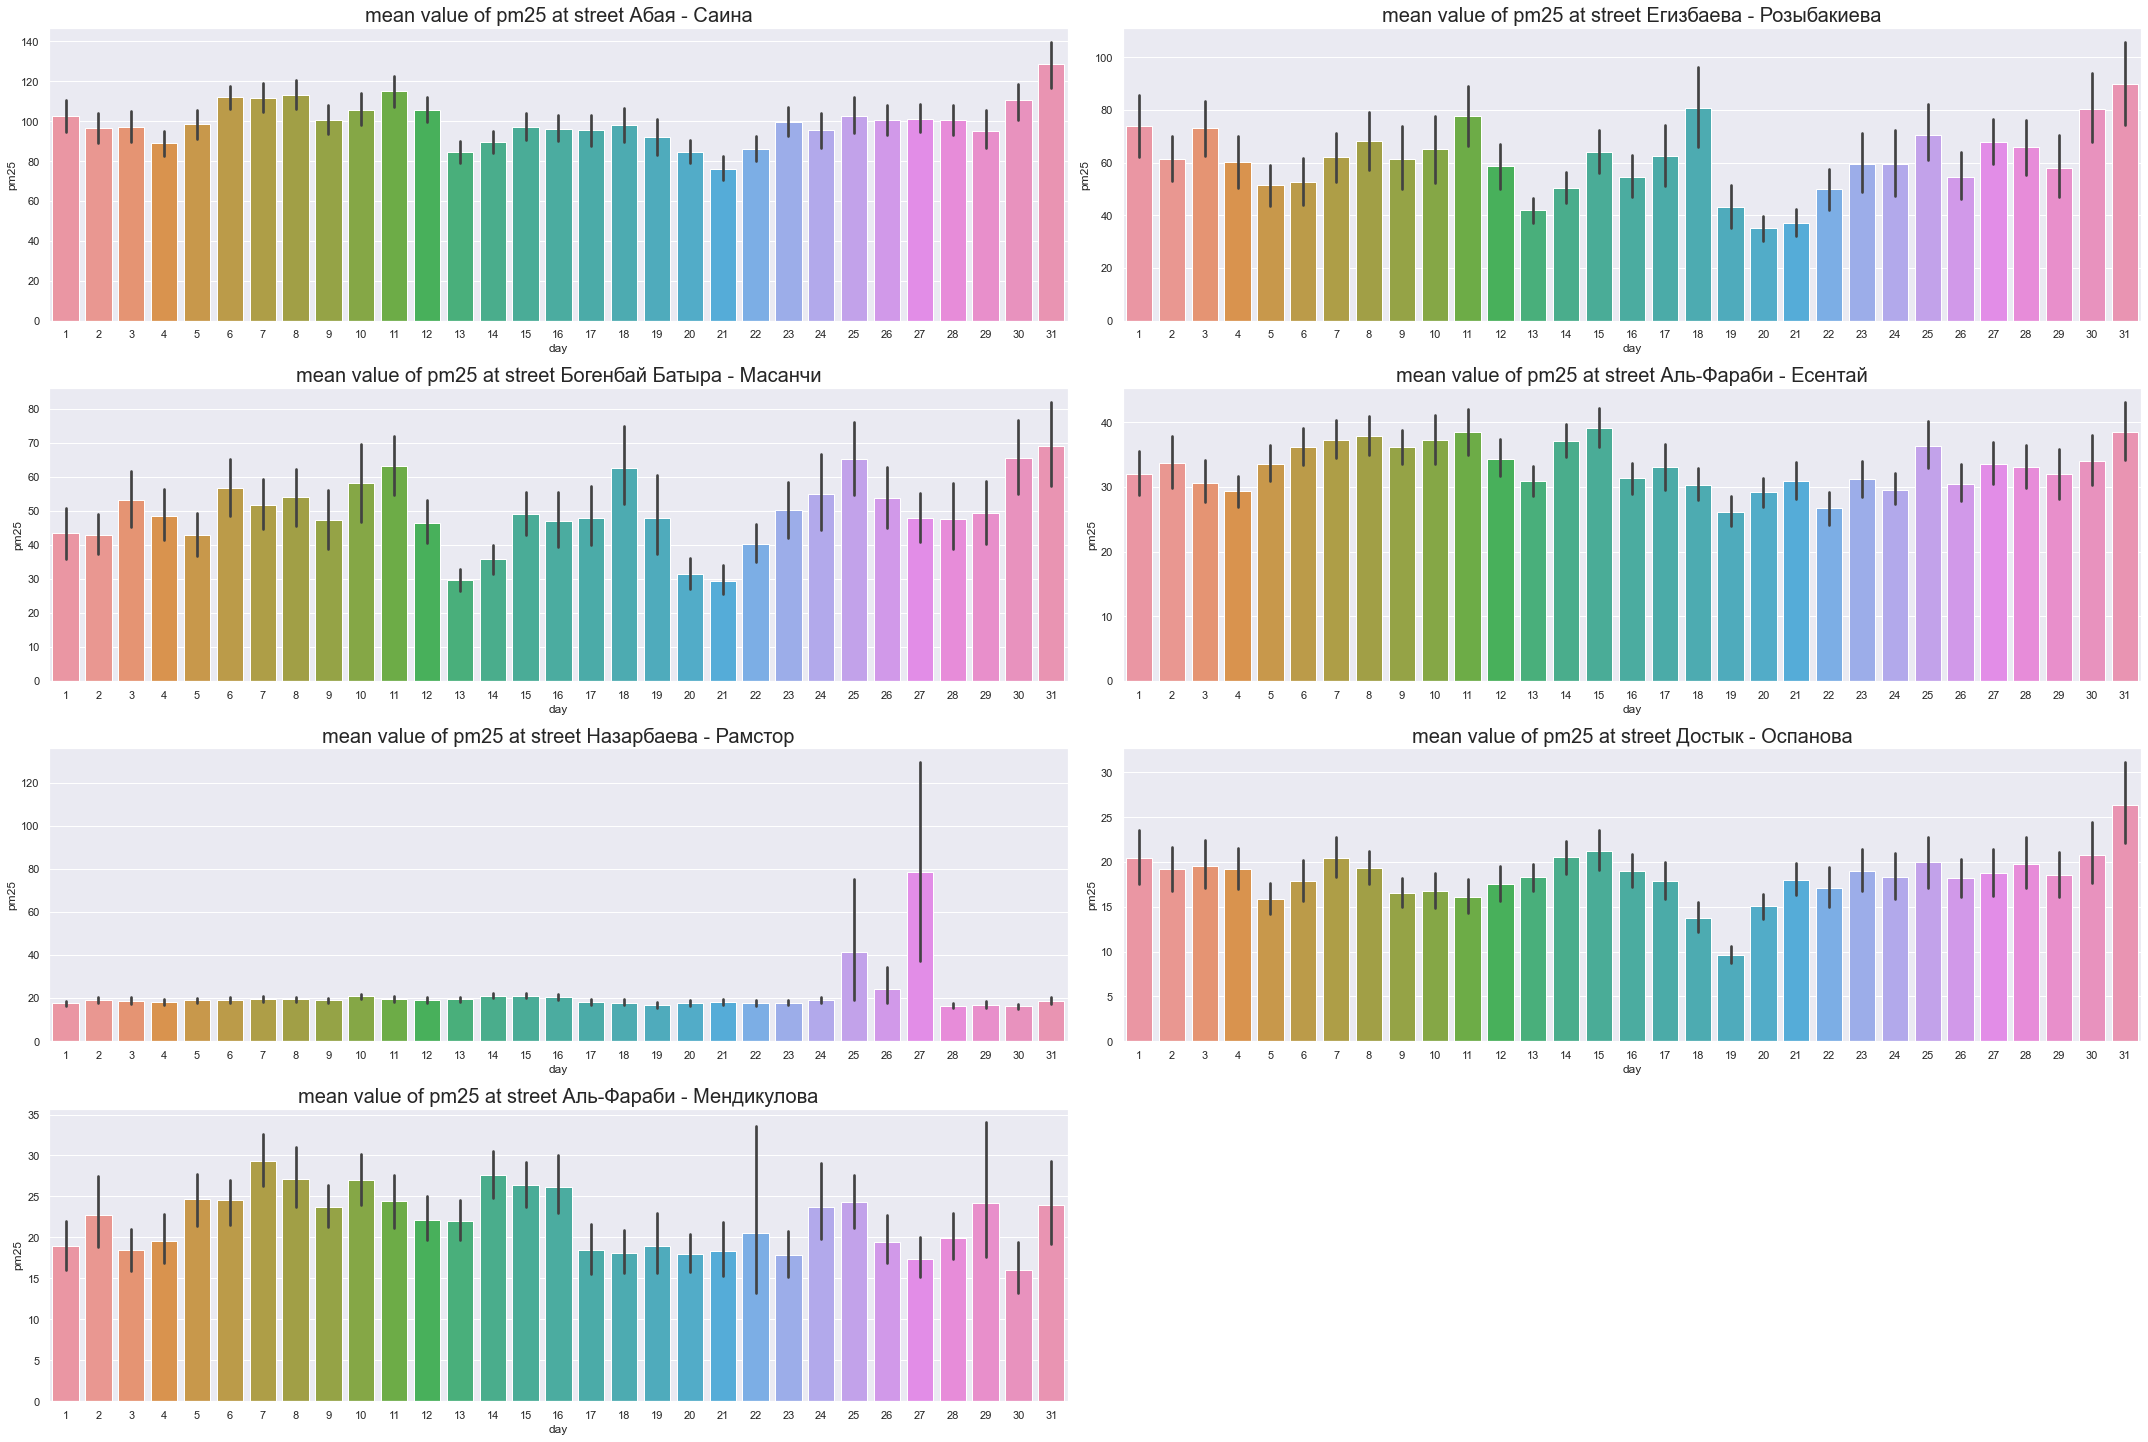

In [ ]:
explore_date(data=data, time="day")

In [ ]:
pd_data.head()

,datetime,stationId,source,city,address,lat,lng,pm25,year,month,day,weekday
0,2022-01-06,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,132.0,2022,January,6,Thursday
1,2022-01-10,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,95.0,2022,January,10,Monday
2,2022-01-13,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,78.0,2022,January,13,Thursday
3,2022-01-14,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,17.0,2022,January,14,Friday
4,2022-01-14,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,42.0,2022,January,14,Friday


In [ ]:
data

,datetime,stationId,source,city,address,lat,lng,pm25
0,2022-01-06 02:00:00 UTC,s1,US Consulate,Алматы,Абая - Саина,43.221890,76.850993,132.00
1,2022-01-10 13:00:00 UTC,s1,US Consulate,Алматы,Абая - Саина,43.221890,76.850993,95.00
2,2022-01-13 20:00:00 UTC,s1,US Consulate,Алматы,Абая - Саина,43.221890,76.850993,78.00
3,2022-01-14 08:00:00 UTC,s1,US Consulate,Алматы,Абая - Саина,43.221890,76.850993,17.00
4,2022-01-14 10:00:00 UTC,s1,US Consulate,Алматы,Абая - Саина,43.221890,76.850993,42.00
...,...,...,...,...,...,...,...,...
63133,2021-09-10 09:00:00 UTC,s6,PurpleAir.com,Алматы,Назарбаева - Рамстор,43.230924,76.950390,6.97
63134,2021-05-20 06:00:00 UTC,s7,PurpleAir.com,Алматы,Достык - Оспанова,43.204942,76.975031,6.97
63135,2021-05-12 17:00:00 UTC,s8,PurpleAir.com,Алматы,Аль-Фараби - Мендикулова,43.227126,76.956792,6.97
63136,2021-04-03 06:00:00 UTC,s8,PurpleAir.com,Алматы,Аль-Фараби - Мендикулова,43.227126,76.956792,6.97
